In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_images.shape

Using TensorFlow backend.


(10000, 28, 28)

In [2]:
train_images.shape

(60000, 28, 28)

In [9]:
from keras import layers
from keras import models
model = models.Sequential() 
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

# Normalize Data

In [11]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255

# One_hot_Encoding

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Compile Model

In [13]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.002),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model Fit

In [14]:
hist=model.fit(train_images, train_labels, epochs=10, batch_size=364,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 167s 4ms/step - loss: 0.5139 - accuracy: 0.8320 - val_loss: 0.0864 - val_accuracy: 0.9732
Epoch 2/10
42000/42000 [==============================] - 176s 4ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0500 - val_accuracy: 0.9856
Epoch 3/10
42000/42000 [==============================] - 172s 4ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0468 - val_accuracy: 0.9860
Epoch 4/10
42000/42000 [==============================] - 179s 4ms/step - loss: 0.0414 - accuracy: 0.9869 - val_loss: 0.0547 - val_accuracy: 0.9836
Epoch 5/10
42000/42000 [==============================] - 185s 4ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0455 - val_accuracy: 0.9860
Epoch 6/10
42000/42000 [==============================] - 188s 4ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0294 - val_accuracy: 0.9912
Epoch 7/10
42000/42000 [==============================] - 190s

# Graph

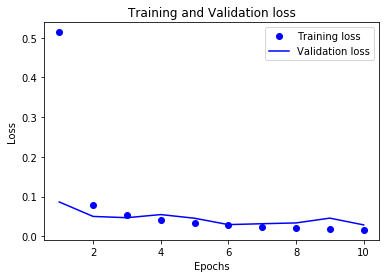

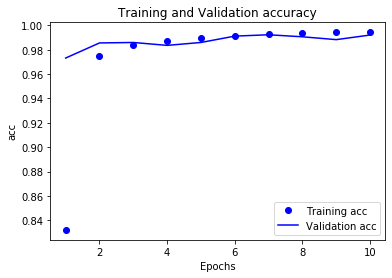

<function matplotlib.pyplot.clf()>

In [16]:
import matplotlib.pyplot as plt
loss_values=hist.history['loss']
val_loss_values=hist.history['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf
acc_values=hist.history['accuracy']
val_acc_values=hist.history['val_accuracy']
epochs=range(1,len(acc_values)+1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.clf

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 10s 1ms/step


In [20]:
print('test_acc:', test_acc) 

test_acc: 0.9933000206947327


In [21]:
model.save("Mnist_CNN.h5")